In [1]:
import pandas as pd
import xgboost as xgb
from sklearn import datasets
from sklearn.preprocessing import OrdinalEncoder

C:\Users\dcdmm\anaconda3\envs\pytorch_env\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
enc = OrdinalEncoder()

X = datasets.fetch_covtype().data[:1000]
y = enc.fit_transform(datasets.fetch_covtype().target[:1000].reshape(-1, 1))
dtrain = xgb.DMatrix(data=X, label=y)

model = xgb.train(params={"max_depth": 4, 'num_class': 7}, dtrain=dtrain)

[17:01:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


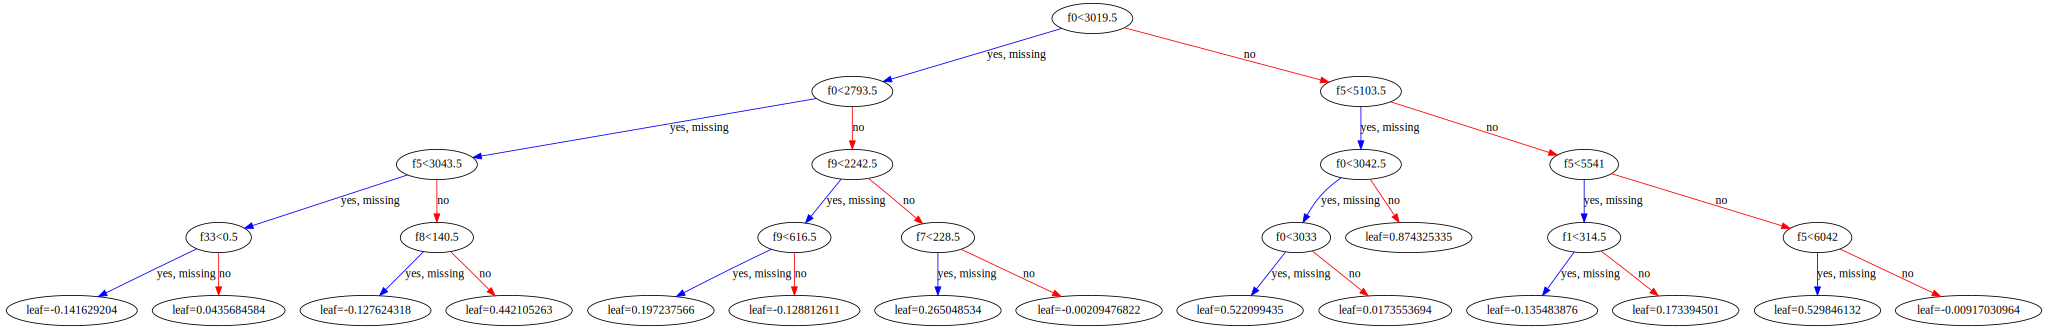

In [3]:
xgb.to_graphviz(model)

In [4]:
df = model.trees_to_dataframe()
df_0 = df[df['Tree'] == 0]
df_0

,Tree,Node,ID,Feature,Split,Yes,No,Missing,Gain,Cover,Category
0,0,0,0-0,f0,3019.5,0-1,0-2,0-1,173.102737,244.897980,NaN
1,0,1,0-1,f0,2793.5,0-3,0-4,0-3,16.369188,201.306137,NaN
2,0,2,0-2,f5,5103.5,0-5,0-6,0-5,36.088760,43.591839,NaN
3,0,3,0-3,f5,3043.5,0-7,0-8,0-7,3.861857,84.489800,NaN
4,0,4,0-4,f9,2242.5,0-9,0-10,0-9,15.718717,116.816338,NaN
5,0,5,0-5,f0,3042.5,0-11,0-12,0-11,4.412003,29.632656,NaN
6,0,6,0-6,f5,5541.0,0-13,0-14,0-13,5.202387,13.959185,NaN
7,0,7,0-7,f33,0.5,0-15,0-16,0-15,1.570381,80.081635,NaN
8,0,8,0-8,f8,140.5,0-17,0-18,0-17,5.472679,4.408164,NaN
9,0,9,0-9,f9,616.5,0-19,0-20,0-19,3.848938,37.959187,NaN


In [5]:
df_0_dec = df_0.loc[:, ['ID', 'Feature', 'Split', 'Yes', 'No', 'Gain']]
df_0_dec

,ID,Feature,Split,Yes,No,Gain
0,0-0,f0,3019.5,0-1,0-2,173.102737
1,0-1,f0,2793.5,0-3,0-4,16.369188
2,0-2,f5,5103.5,0-5,0-6,36.088760
3,0-3,f5,3043.5,0-7,0-8,3.861857
4,0-4,f9,2242.5,0-9,0-10,15.718717
5,0-5,f0,3042.5,0-11,0-12,4.412003
6,0-6,f5,5541.0,0-13,0-14,5.202387
7,0-7,f33,0.5,0-15,0-16,1.570381
8,0-8,f8,140.5,0-17,0-18,5.472679
9,0-9,f9,616.5,0-19,0-20,3.848938


In [6]:
df_0_dec_leaf = df_0_dec[df_0_dec['Feature'] == 'Leaf']
df_0_dec_leaf

,ID,Feature,Split,Yes,No,Gain
12,0-12,Leaf,NaN,NaN,NaN,0.874325
15,0-15,Leaf,NaN,NaN,NaN,-0.141629
16,0-16,Leaf,NaN,NaN,NaN,0.043568
17,0-17,Leaf,NaN,NaN,NaN,-0.127624
18,0-18,Leaf,NaN,NaN,NaN,0.442105
19,0-19,Leaf,NaN,NaN,NaN,0.197238
20,0-20,Leaf,NaN,NaN,NaN,-0.128813
21,0-21,Leaf,NaN,NaN,NaN,0.265049
22,0-22,Leaf,NaN,NaN,NaN,-0.002095
23,0-23,Leaf,NaN,NaN,NaN,0.522099


In [7]:
df_0_dec_no_leaf = df_0_dec[df_0_dec['Feature'] != 'Leaf']
df_0_dec_no_leaf

,ID,Feature,Split,Yes,No,Gain
0,0-0,f0,3019.5,0-1,0-2,173.102737
1,0-1,f0,2793.5,0-3,0-4,16.369188
2,0-2,f5,5103.5,0-5,0-6,36.088760
3,0-3,f5,3043.5,0-7,0-8,3.861857
4,0-4,f9,2242.5,0-9,0-10,15.718717
5,0-5,f0,3042.5,0-11,0-12,4.412003
6,0-6,f5,5541.0,0-13,0-14,5.202387
7,0-7,f33,0.5,0-15,0-16,1.570381
8,0-8,f8,140.5,0-17,0-18,5.472679
9,0-9,f9,616.5,0-19,0-20,3.848938


In [8]:
# 示例:
# 根0-12;Gain=0.874325

In [9]:
yes = df_0_dec_no_leaf['Yes'] == '0-12'
yes

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
13    False
14    False
Name: Yes, dtype: bool

In [10]:
no = df_0_dec_no_leaf['No'] == '0-12'
no  # True

0     False
1     False
2     False
3     False
4     False
5      True
6     False
7     False
8     False
9     False
10    False
11    False
13    False
14    False
Name: No, dtype: bool

In [11]:
df_0_dec_no_leaf_1 = df_0_dec_no_leaf[no]
df_0_dec_no_leaf_1  # 0-5

,ID,Feature,Split,Yes,No,Gain
5,0-5,f0,3042.5,0-11,0-12,4.412003


In [12]:
yes1 = df_0_dec_no_leaf['Yes'] == '0-5'
yes1  # True

0     False
1     False
2      True
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
13    False
14    False
Name: Yes, dtype: bool

In [13]:
no1 = df_0_dec_no_leaf['No'] == '0-5'
no1

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
13    False
14    False
Name: No, dtype: bool

In [14]:
df_0_dec_no_leaf_2 = df_0_dec_no_leaf[yes1]
df_0_dec_no_leaf_2  # 0-2

,ID,Feature,Split,Yes,No,Gain
2,0-2,f5,5103.5,0-5,0-6,36.08876


In [15]:
yes2 = df_0_dec_no_leaf['Yes'] == '0-2'
yes2

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
13    False
14    False
Name: Yes, dtype: bool

In [16]:
no2 = df_0_dec_no_leaf['No'] == '0-2'
no2  # True

0      True
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
13    False
14    False
Name: No, dtype: bool

In [17]:
df_0_dec_no_leaf_3 = df_0_dec_no_leaf[no2]
df_0_dec_no_leaf_3  # 0-0 # 完整的一条路线

,ID,Feature,Split,Yes,No,Gain
0,0-0,f0,3019.5,0-1,0-2,173.102737


In [18]:
df_0_dec_leaf

,ID,Feature,Split,Yes,No,Gain
12,0-12,Leaf,NaN,NaN,NaN,0.874325
15,0-15,Leaf,NaN,NaN,NaN,-0.141629
16,0-16,Leaf,NaN,NaN,NaN,0.043568
17,0-17,Leaf,NaN,NaN,NaN,-0.127624
18,0-18,Leaf,NaN,NaN,NaN,0.442105
19,0-19,Leaf,NaN,NaN,NaN,0.197238
20,0-20,Leaf,NaN,NaN,NaN,-0.128813
21,0-21,Leaf,NaN,NaN,NaN,0.265049
22,0-22,Leaf,NaN,NaN,NaN,-0.002095
23,0-23,Leaf,NaN,NaN,NaN,0.522099


In [32]:
path_list = []
for i in df_0_dec_leaf.iterrows():
    path_list.append([i[1]['Gain']])

    y1 = df_0_dec_no_leaf['Yes'] == i[1]['ID']
    n1 = df_0_dec_no_leaf['No'] == i[1]['ID']
    if y1.sum() == 1:
        pass
    else:
        df_0_dec_no_leaf_2  = df_0_dec_no_leaf[n1]
        print(df_0_dec_no_leaf_2['ID'].values)
        print(df_0_dec_no_leaf_2['Feature'].values)
        print(df_0_dec_no_leaf_2['Split'].values)
        print(df_0_dec_no_leaf_2['Gain'].values)

    break

['0-5']
['f0']
[3042.5]
[4.41200256]


In [33]:
path_list

[[0.874325335]]